In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [4]:
## Read data from csv file 'student-mat.csv'
math_data = pd.read_csv('student-mat.csv', sep=';')

## Read data from csv file 'student-por.csv'
port_data = pd.read_csv('student-por.csv', sep=';')

In [5]:
math_data.head()
port_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [6]:
math_data.shape
port_data.shape

(395, 33)

(649, 33)

In [7]:
# Making dummy variables in math data and saving as mathdata_dummy

mathdata_dummy = pd.get_dummies(math_data, columns=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'], drop_first=True)


mathdata_dummy.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


In [11]:
# Starting Regression


# Creating MX AND MX1
# MX - selecting only the predictor variables and not the response variable G3 including G1 and G2

# MX1 - Selecting all the predictor variables including G1 and G2  

MX = mathdata_dummy[['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'school_MS',
 'sex_M',
 'address_U',
 'famsize_LE3',
 'Pstatus_T',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_mother',
 'guardian_other',
 'schoolsup_yes',
 'famsup_yes',
 'paid_yes',
 'activities_yes',
 'nursery_yes',
 'higher_yes',
 'internet_yes',
 'romantic_yes']]


MX.head()

print(MX.shape)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


(395, 39)


In [12]:
#Listing the column names of math data

list(mathdata_dummy.columns)

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 'school_MS',
 'sex_M',
 'address_U',
 'famsize_LE3',
 'Pstatus_T',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_mother',
 'guardian_other',
 'schoolsup_yes',
 'famsup_yes',
 'paid_yes',
 'activities_yes',
 'nursery_yes',
 'higher_yes',
 'internet_yes',
 'romantic_yes']

In [13]:
# Y dependent variable of mathdata_dummy

MY = mathdata_dummy['G3']

MY.head()


0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

In [29]:
MXGrade = mathdata_dummy[['age','G1','G2','G3','failures','absences']]

In [30]:
correlation1 = MXGrade.corr()

,age,G1,G2,G3,failures,absences
age,1.000000,-0.064081,-0.143474,-0.161579,0.243665,0.175230
G1,-0.064081,1.000000,0.852118,0.801468,-0.354718,-0.031003
G2,-0.143474,0.852118,1.000000,0.904868,-0.355896,-0.031777
G3,-0.161579,0.801468,0.904868,1.000000,-0.360415,0.034247
failures,0.243665,-0.354718,-0.355896,-0.360415,1.000000,0.063726
absences,0.175230,-0.031003,-0.031777,0.034247,0.063726,1.000000


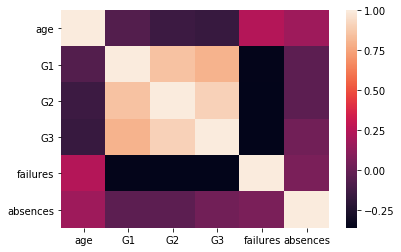

In [31]:
#checking correlation between age g1 g2 g3

correlation1
import seaborn
seaborn.heatmap(correlation1)

In [14]:
#Regression Model Excluding G1 and G2
import statsmodels.api as sb

MX = sb.add_constant(MX)

mod1 = sb.OLS(MY,MX)

fii1 = mod1.fit()

In [15]:
fii1

In [16]:
som1 = fii1.summary()

In [17]:
som1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     3.463
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           3.32e-10
Time:                        16:50:35   Log-Likelihood:                -1097.5
No. Observations:                 395   AIC:                             2275.
Df Residuals:                     355   BIC:                             2434.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                14.0777      4.481      3.142      0.002       5.265      22.890
age                  -0.3752      0.217     -1.727      0.085      -0.802       0.052
Medu                  0.4569      0.323      1.414      0.158      -0.179       1.092
Fedu                 -0.1046      0.278     -0.377      0.707      -0.651       0.441
traveltime           -0.2403      0.339     -0.709      0.479      -0.907       0.426
studytime             0.5495      0.288      1.910      0.057      -0.016       1.115
failures             -1.7240      0.333     -5.179      0.000      -2.379      -1.069
famrel                0.2316      0.246      0.942      0.347      -0.252       0.715
freetime              0.3024      0.237      1.274      0.203      -0.164       0.769
goout                -0.5937      0.225     -2.644      0.009      -1.035      -0.152
Dalc                 -0.2722      0.331     -0.823      0.411      -0.923       0.378
Walc                  0.2634      0.248      1.062      0.289      -0.224       0.751
health               -0.1768      0.161     -1.098      0.273      -0.493       0.140
absences              0.0563      0.029      1.943      0.053      -0.001       0.113
school_MS             0.7256      0.792      0.917      0.360      -0.831       2.282
sex_M                 1.2624      0.500      2.525      0.012       0.279       2.246
address_U             0.5513      0.584      0.944      0.346      -0.597       1.700
famsize_LE3           0.7028      0.488      1.439      0.151      -0.257       1.663
Pstatus_T            -0.3201      0.724     -0.442      0.659      -1.744       1.104
Mjob_health           0.9981      1.118      0.893      0.373      -1.201       3.197
Mjob_other           -0.3590      0.713     -0.503      0.615      -1.762       1.044
Mjob_services         0.6583      0.798      0.825      0.410      -0.911       2.227
Mjob_teacher         -1.2415      1.038     -1.196      0.233      -3.283       0.800
Fjob_health           0.3477      1.438      0.242      0.809      -2.480       3.176
Fjob_other           -0.6197      1.023     -0.606      0.545      -2.632       1.392
Fjob_services        -0.4658      1.057     -0.441      0.660      -2.544       1.613
Fjob_teacher          1.3262      1.297      1.023      0.307      -1.224       3.876
reason_home           0.0785      0.554      0.142      0.887      -1.011       1.168
reason_other          0.7771      0.818      0.950      0.343      -0.831       2.385
reason_reputation     0.6130      0.577      1.063      0.288      -0.521       1.747
guardian_mother       0.0698      0.546      0.128      0.898      -1.003       1.143
guardian_other        0.7501      0.999      0.751      0.453      -1.216       2.716
schoolsup_yes        -1.3506      0.667     -2.025      0.044      -2.662

In [22]:
# Starting Regression Model with Interaction effects
# Created MX4 which contains all the variables

MX4 = mathdata_dummy[['age',
 'Medu',
 'Fedu',
 'traveltime',
'studytime',
 'failures',
 'famrel',
'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 'school_MS',
 'sex_M',
 'address_U',
 'famsize_LE3',
 'Pstatus_T',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_mother',
 'guardian_other',
'schoolsup_yes',
 'famsup_yes',
 'paid_yes',
 'activities_yes',
 'nursery_yes',
 'higher_yes',
 'internet_yes',
 'romantic_yes']]

MX4.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


In [23]:
# REGRESSION MODEL WITH INTERACTION EFFECTS

import statsmodels.formula.api as smf
model_interaction = smf.ols(formula='G3 ~ failures + goout + sex_M + schoolsup_yes + romantic_yes + failures:goout + failures:sex_M + failures:schoolsup_yes + failures:romantic_yes + goout:sex_M + goout:schoolsup_yes + goout:romantic_yes + sex_M:schoolsup_yes + sex_M:romantic_yes +schoolsup_yes:romantic_yes', data=MX4).fit()
summary = model_interaction.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     6.210
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           9.59e-12
Time:                        16:54:45   Log-Likelihood:                -1117.8
No. Observations:                 395   AIC:                             2268.
Df Residuals:                     379   BIC:                             2331.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     12.8078      1.137     11.268      0.000      10.573      15.043
failures                      -2.9940      0.923     -3.243      0.001      -4.810      -1.178
goout                         -0.5200      0.342     -1.521      0.129      -1.192       0.152
sex_M                          1.1825      1.338      0.884      0.377      -1.448       3.813
schoolsup_yes                 -0.4928      1.896     -0.260      0.795      -4.220       3.234
romantic_yes                  -2.3911      1.402     -1.706      0.089      -5.147       0.365
failures:goout                 0.3877      0.248      1.561      0.119      -0.101       0.876
failures:sex_M                -1.2273      0.620     -1.980      0.048      -2.446      -0.009
failures:schoolsup_yes         2.0577      0.928      2.217      0.027       0.233       3.883
failures:romantic_yes         -0.2817      0.606     -0.465      0.642      -1.472       0.909
goout:sex_M                   -0.0426      0.395     -0.108      0.914      -0.820       0.735
goout:schoolsup_yes           -0.4057      0.552     -0.735      0.463      -1.490       0.679
goout:romantic_yes             0.3432      0.417      0.823      0.411      -0.476       1.163
sex_M:schoolsup_yes           -1.1113      1.378     -0.806      0.421      -3.822       1.599
sex_M:romantic_yes             0.9246      0.926      0.998      0.319      -0.897       2.746
schoolsup_yes:romantic_yes     1.0825      1.494      0.724      0.469      -1.856       4.021
==============================================================================
Omnibus:                       31.291   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.669
Skew:                          -0.692   Prob(JB):                     1.09e-08
Kurtosis:                       3.558   Cond. No.                         47.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

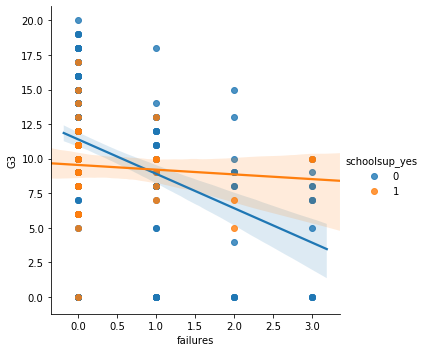

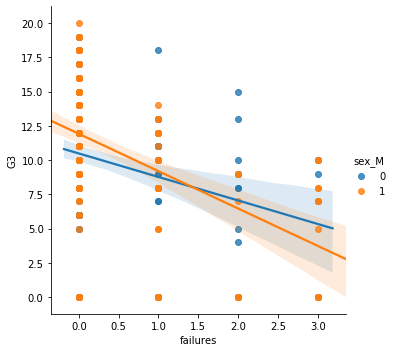

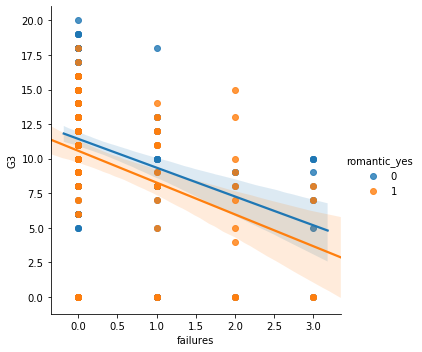

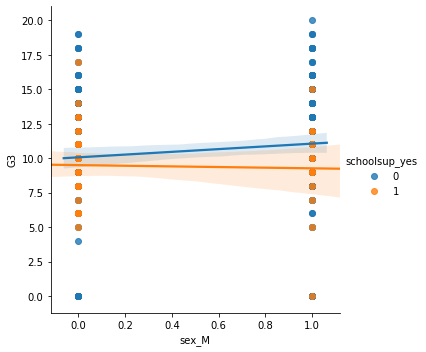

In [28]:
# Intersecting lines represent Interaction effect

# Presence of Interaction effect of failures*schoolsup_yes on G3
import seaborn
seaborn.lmplot(y='G3', x='failures', hue='schoolsup_yes', data=MX4)

# Presence of Interaction effect of failures*sex_M on G3
seaborn.lmplot(y='G3', x='failures', hue='sex_M', data=MX4)

# No Presence of Interaction effect between failures*romantic_yes on G3
seaborn.lmplot(y='G3', x='failures', hue='romantic_yes', data=MX4)

# No Presence of Interaction effect between sex_M*schoolsup_yes on G3
seaborn.lmplot(y='G3', x='sex_M', hue='schoolsup_yes', data=MX4)